In [1]:
from data_score import Read_Data
n = 3
m = 2
D = Read_Data('feature_data_1', n)
# a few tips to prepare feature data:
    # 1.replace tabular to space
    # 2.use the first line to record the index of features and the number of lines
show_BF = False
onelocal = False
use_y = True

 ... (more hidden) ...


Brute force results: [('101010000000000', 3717.9198378645087), ('101010001000000', 3717.9198378645087), ('101010011000000', 3717.9198378645087), ('101010100000000', 3717.9198378645087), ('101010110000000', 3717.9198378645087), ('101010111000000', 3717.9198378645087), ('100110100100000', 3719.691186416713), ('100110110100000', 3719.691186416713), ('100110111100000', 3719.691186416713), ('100110000000001', 3720.2727080196137), ('100110100000001', 3720.2727080196137), ('100110110000001', 3720.2727080196137), ('101001011010000', 3720.8216197398433), ('101001110010000', 3720.8216197398433), ('101001111010000', 3720.8216197398433), ('11010000000010', 3721.640500895849), ('11010001000010', 3721.640500895849), ('11010100000010', 3721.640500895849), ('101001001000100', 3722.076345008484), ('101001011000100', 3722.076345008484), ('101001111000100', 3722.076345008484), ('11010000001000', 3722.313704561586), ('11010001001000', 3722.313704561586), ('11010011001000', 3722.313704561586), ('1000101001

 ... (more hidden) ...

101010000000000 3717.9198378645087


 ... (more hidden) ...


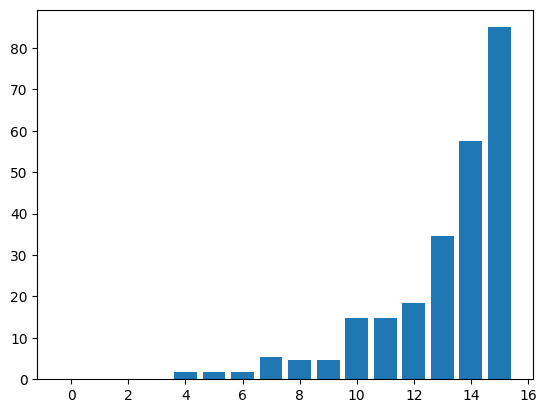

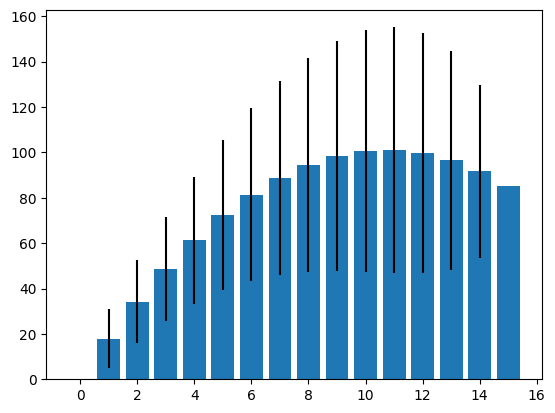

In [2]:
from hamiltonian import bf, hamiltonian_para, calculate_Delta_ji, generate_delta
Delta_ji = calculate_Delta_ji(n, m, D)
delta_max_i, delta_cons_ij, delta_trans_ijk = generate_delta(Delta_ji)
C, h, J = hamiltonian_para(n, m, D, delta_max_i, delta_cons_ij, delta_trans_ijk, onelocal, use_y)
bf(C, h, J, n)

In [3]:
from qannealing import annealing
from qiskit import  transpile
from qiskit_aer import AerSimulator
import heapq
from operator import itemgetter

M = 100
T = 10
lamda = 1
shots = 10000
circ = annealing(n, M, h, J, T, lamda, use_y)
simulator = AerSimulator()
compiled_circuit = transpile(circ, simulator)
job = simulator.run(compiled_circuit, shots = shots)
res = job.result()
counts = res.get_counts(compiled_circuit)
best_counts = dict(heapq.nlargest(5, counts.items(),key=itemgetter(1)))
print(best_counts)

{'011001001011111': 466, '010101110111111': 397, '010110000101111': 387, '010101100111111': 383, '010101001111111': 351}


False
[0, 0, 0, 0, 0, 1]
the optimal ans is  [0, 0, 0, 0, 0, 1] [0, 1, 1] [0, 1, 1, 0, 0, 1]


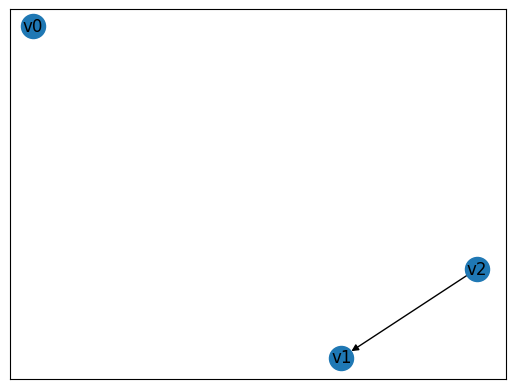

In [4]:
from analysis_toolkit import res_extractor, res_draw
import numpy as np

d0 = r0 = y0 = is_cons0 = is_dag0 = is_legal0 = G0 = None
for tmp in best_counts:
    d, r, y, is_cons, is_dag, is_legal, G = res_extractor(tmp, n, m, use_y)
    print(d)
    if d0 == None and d != list(np.zeros((int(n*(n-1)), 1))) and is_cons and is_dag and is_legal:
        d0, r0, y0, is_cons0, is_dag0, is_legal0, G0 = d, r, y, is_cons, is_dag, is_legal, G
        break

res_draw(d0, r0, y0, is_cons0, is_dag0, is_legal0, G0, use_y)